<a href="https://colab.research.google.com/github/Rami-Alkadi/Rami-Alkadi_webdevpage/blob/main/Week%205%20Building%20the%20product/Rami/elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all needed libraries

from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_line
from plotnine import *
from plotnine.data import mpg
from sklearn.metrics import silhouette_score
from sklearn import decomposition
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors


Scale data


In [ ]:
df = pd.read_excel("/content/dataframe_Breda.xlsx")
df1 = df.drop("neighborhood_name", 1)

z = StandardScaler()
scaled_df1 = z.fit_transform(df1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


PCA

In [ ]:
#pca model

pca = decomposition.PCA(n_components=2)

#fitting the model

pca.fit(scaled_df1)

pcaData = pca.transform(scaled_df1)

x = pcaData[:,0]
y = pcaData[:,1]
pcaData.shape


(41, 2)

In [ ]:
pcaData

array([[ 8.27170185e+00,  7.62872765e+00],
       [ 3.57610423e+00,  6.23694067e+00],
       [ 1.14061378e+01,  5.09434132e-01],
       [ 1.42591555e+01,  6.60196041e+00],
       [ 9.35093120e+00,  3.57821261e+00],
       [ 1.11822388e+01,  9.58753564e+00],
       [ 4.95806607e-01, -1.62529947e+00],
       [ 6.11316435e+00, -1.80019548e+00],
       [ 5.40552645e+00, -4.39234170e+00],
       [ 6.90224822e+00, -5.69966370e+00],
       [ 3.82151567e+00, -4.82042033e+00],
       [ 5.90409195e+00, -4.76172664e+00],
       [-3.07834206e+00, -8.01229138e+00],
       [ 4.08527007e+00,  3.10355735e-03],
       [-4.62329231e+00,  3.39784524e+00],
       [-2.93446983e+00,  1.63251645e+00],
       [-7.83041162e-01, -4.24865047e-01],
       [-4.24466121e+00,  2.73881858e-02],
       [-2.36032868e+00,  2.58217124e+00],
       [-5.87989214e+00,  4.59686302e+00],
       [-6.92870161e+00,  2.31185269e+00],
       [-4.21073560e+00,  1.69954683e+00],
       [-8.04292721e+00,  8.50604370e+00],
       [ 4.

In [ ]:


pca_df = pd.DataFrame(data = pcaData, columns = ['pca1', 'pca2'])
pca_df


,pca1,pca2
0,8.271702,7.628728
1,3.576104,6.236941
2,11.406138,0.509434
3,14.259155,6.601960
4,9.350931,3.578213
5,11.182239,9.587536
6,0.495807,-1.625299
7,6.113164,-1.800195
8,5.405526,-4.392342
9,6.902248,-5.699664


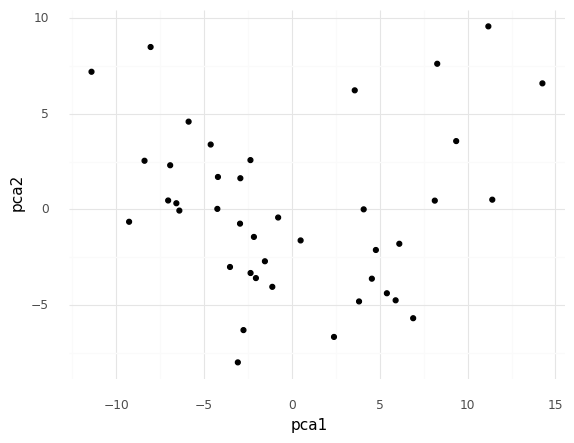

<ggplot: (8743328821561)>

In [ ]:
ggplot(pca_df,aes(x = "pca1" , y = "pca2" )) + geom_point() + theme_minimal()

In [ ]:
from sklearn import neighbors
mins = 3
nn = NearestNeighbors(n_neighbors = mins + 1)

#  nn.fit(pca_df(x,y))
 # distances, neighbors = nn.kneighbors(pcaData(x,y))

  #distances

#neigh = NearestNeighbors(n_neighbors=4)
nbrs = nn.fit(pca_df[["pca1","pca2"]])
distances, indices = nbrs.kneighbors(pca_df[["pca1","pca2"]])
distances

# distncases our data points and 3 nearest neihbors

array([[0.        , 3.5082979 , 4.19182634, 4.8975206 ],
       [0.        , 4.8975206 , 6.25459631, 6.35747288],
       [0.        , 3.27432013, 3.69340972, 5.77494211],
       [0.        , 4.28731566, 5.76486915, 6.07485406],
       [0.        , 3.34834024, 3.69340972, 4.19182634],
       [0.        , 3.5082979 , 4.28731566, 6.28216929],
       [0.        , 1.75399385, 2.30727624, 2.66491688],
       [0.        , 1.37268376, 2.40548683, 2.68700083],
       [0.        , 0.62049399, 1.14648095, 1.64083559],
       [0.        , 1.36968678, 1.98727624, 3.13371432],
       [0.        , 1.39680777, 1.64083559, 2.0834032 ],
       [0.        , 0.62049399, 1.36968678, 1.76530224],
       [0.        , 1.7202646 , 4.41656178, 4.53293112],
       [0.        , 2.23885281, 2.7137138 , 3.66155419],
       [0.        , 1.73686118, 1.74769005, 2.40547884],
       [0.        , 1.10972172, 1.2780248 , 2.07196481],
       [0.        , 1.71375631, 1.75399385, 2.19355465],
       [0.        , 1.50553849,

# sort the distances

In [ ]:
#distances1 = np.sort(distances, axis=0)
#distances1 = distances[:,1]
#plt.plot(distances1)



Running the renect code will give me different graph based on distance of 2nd column

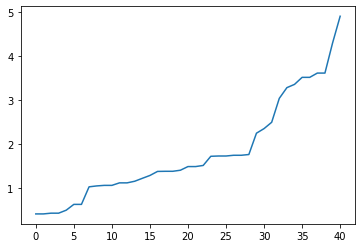

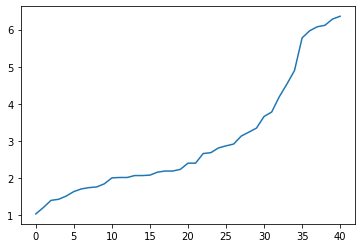

In [ ]:
distances = np.sort(distances[:,mins], axis=0)
plt.plot(distances)

this graph is my final elbow graph, it grabs the last column, gives us "mins" columns that given above, and this will give us the sorted list of all our distnaces

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: elbow.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


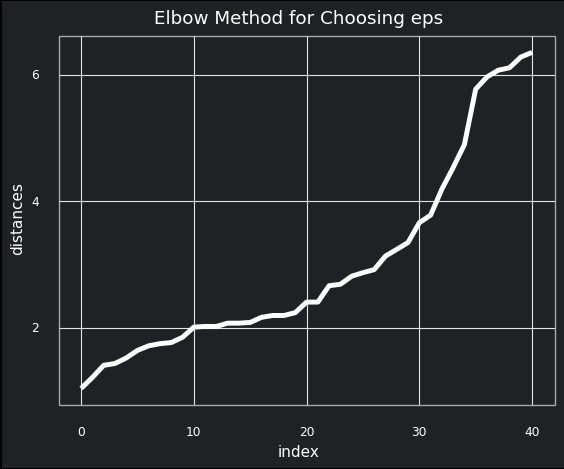

<ggplot: (8743328440469)>

In [ ]:
#plot the distances with better plot
distances_df = pd.DataFrame({"distances":distances,
                             "index":list(range(0,len(distances)))})
plt = (ggplot(distances_df,aes(x="index",y="distances"))+
 geom_line(color="white",size=2)+theme_minimal()+
 labs(title="Elbow Method for Choosing eps")+
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill="#202124ff"),
      axis_text=element_text(color="white"),
      axis_title=element_text(color="white"),
      plot_title=element_text(color="white"),
      panel_border=element_line(color="darkgray"),
      plot_background = element_rect(fill="#202124ff")
      ))
ggsave(plot=plt,filename='elbow.png',dpi=300)
plt

After plotting eblow method, now i will try to detect an inflection point, and i would say the inflection point is arround (2.5 to 3). and this will be my eps for my dpscan

In [ ]:
db1=DBSCAN(eps=2.5,min_samples=3).fit(pca_df)

In [ ]:
labbel=db1.labels_
print(labbel)

[-1 -1 -1 -1 -1 -1  0  1  1  1  1  1 -1  1  0  0  0  0  0  0  0  0 -1  1
  1 -1  0  0 -1  0  0  1  0  0  0 -1  0  0  0  0  0]


In [ ]:
data = pca_df
data['Clusters'] = labbel
data

,pca1,pca2,Clusters
0,8.271702,7.628728,-1
1,3.576104,6.236941,-1
2,11.406138,0.509434,-1
3,14.259155,6.601960,-1
4,9.350931,3.578213,-1
5,11.182239,9.587536,-1
6,0.495807,-1.625299,0
7,6.113164,-1.800195,1
8,5.405526,-4.392342,1
9,6.902248,-5.699664,1


In [ ]:
nb = df['neighborhood_name']
print(nb)

0          Valkenberg
1              Chassé
2          Fellenoord
3         Schorsmolen
4             Station
5                City
6             Belcrum
7      Doornbos-Linie
8            Biesdonk
9         Geeren-zuid
10          Wisselaar
11       Geeren-noord
12        Waterdonken
13        Brabantpark
14          Sportpark
15           Zandberg
16        Heusdenhout
17         Blauwe Kei
18            Ypelaar
19          Overakker
20           Ginneken
21           Boeimeer
22         Ruitersbos
23          Haagpoort
24             Heuvel
25           Tuinzigt
26        Princenhage
27         Westerpark
28            Liesbos
29          Gageldonk
30        Kievitsloop
31           Kesteren
32         Muizenberg
33         Heksenwiel
34        Overkroeten
35            Kroeten
36              Bavel
37    Nieuw Wolfslaar
38          Ulvenhout
39        Prinsenbeek
40         Teteringen
Name: neighborhood_name, dtype: object


In [ ]:
final_df = pd.concat([nb, data], axis=1)
final_df.sort_values(by=['Clusters'], inplace=True)
print(final_df)


   neighborhood_name       pca1      pca2  Clusters
0         Valkenberg   8.271702  7.628728        -1
28           Liesbos -11.407446  7.210021        -1
12       Waterdonken  -3.078342 -8.012291        -1
25          Tuinzigt   8.132198  0.459548        -1
35           Kroeten  -2.757027 -6.322301        -1
22        Ruitersbos  -8.042927  8.506044        -1
4            Station   9.350931  3.578213        -1
3        Schorsmolen  14.259155  6.601960        -1
2         Fellenoord  11.406138  0.509434        -1
1             Chassé   3.576104  6.236941        -1
5               City  11.182239  9.587536        -1
38         Ulvenhout  -8.389758  2.548553         0
37   Nieuw Wolfslaar  -9.267136 -0.647840         0
36             Bavel  -7.044037  0.466720         0
33        Heksenwiel  -2.162757 -1.441400         0
32        Muizenberg  -1.115633 -4.055804         0
30       Kievitsloop  -2.049337 -3.597700         0
29         Gageldonk  -1.537275 -2.716217         0
27        We

In [ ]:
labelList = ["Noise"]
labelList = labelList + ["Cluster" + str(i) for i in range(1,len(set(db1.labels_)))]
#df1["gemiddelde_woz_waarde_woning"] = db1.labels_


(ggplot(df1, aes( x = "pca1", y = "pca2", color = "factor(gemiddelde_woz_waarde_woning)")) + geom_point() + theme_minimal() + 
scale_color_discrete(name = "Cluster Assignment", labels = labelList) + theme(panel_grid_major= element_blank())+
labs(title = "DBSCAN with eps = 0.5, min_samples = 2"))

SyntaxError: ignored